Epoch 1/5


E:\python\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


675/675 ━━━━━━━━━━━━━━━━━━━━ 49s 62ms/step - accuracy: 0.1623 - loss: 1.7935 - val_accuracy: 0.1582 - val_loss: 1.7921
Epoch 2/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 42s 62ms/step - accuracy: 0.1632 - loss: 1.7927 - val_accuracy: 0.1621 - val_loss: 1.7920
Epoch 3/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 43s 63ms/step - accuracy: 0.1728 - loss: 1.7920 - val_accuracy: 0.1619 - val_loss: 1.7923
Epoch 4/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 43s 64ms/step - accuracy: 0.1666 - loss: 1.7918 - val_accuracy: 0.1622 - val_loss: 1.7936
Epoch 5/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.1746 - loss: 1.7914 - val_accuracy: 0.1587 - val_loss: 1.7916
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.1706 - loss: 1.7915
LSTM Accuracy: 17.24%
Epoch 1/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 66s 87ms/step - accuracy: 0.3018 - loss: 1.6363 - val_accuracy: 0.6803 - val_loss: 0.9207
Epoch 2/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 56s 83ms/step - accuracy: 0.7598 - loss: 0.7283 - val_accuracy: 0.7749 - val_loss: 0.6884
Epoch 3/5

E:\python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00      1230
     disgust       0.17      1.00      0.29      1233
        fear       1.00      0.00      0.01      1149
       happy       0.00      0.00      0.00      1205
         sad       0.50      0.00      0.01      1209
    surprise       0.00      0.00      0.00      1174

    accuracy                           0.17      7200
   macro avg       0.28      0.17      0.05      7200
weighted avg       0.27      0.17      0.05      7200



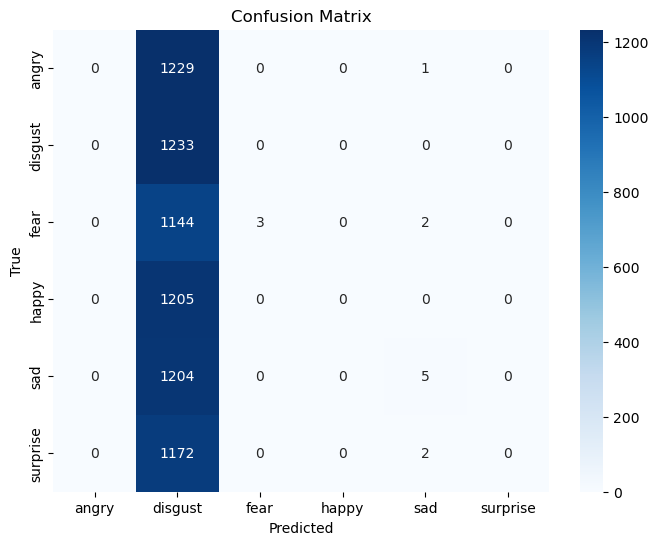

Bi-LSTM Model Evaluation
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step
Classification Report:
               precision    recall  f1-score   support

       angry       0.80      0.79      0.79      1230
     disgust       0.85      0.86      0.86      1233
        fear       0.90      0.89      0.90      1149
       happy       0.81      0.84      0.83      1205
         sad       0.75      0.67      0.71      1209
    surprise       0.83      0.90      0.87      1174

    accuracy                           0.83      7200
   macro avg       0.83      0.83      0.83      7200
weighted avg       0.82      0.83      0.82      7200



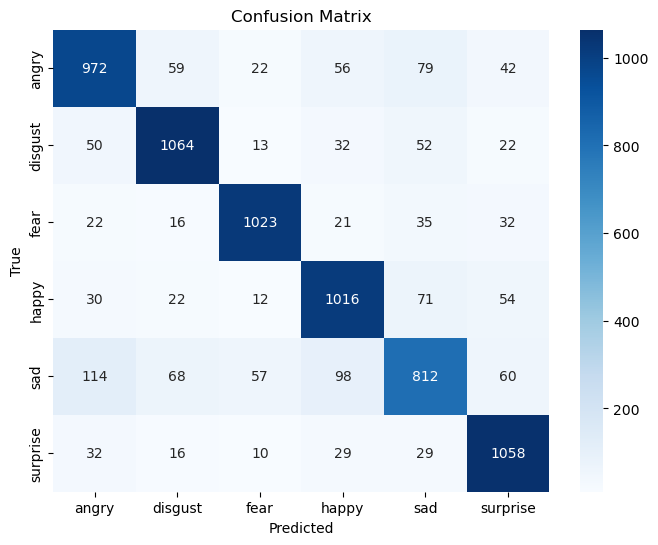

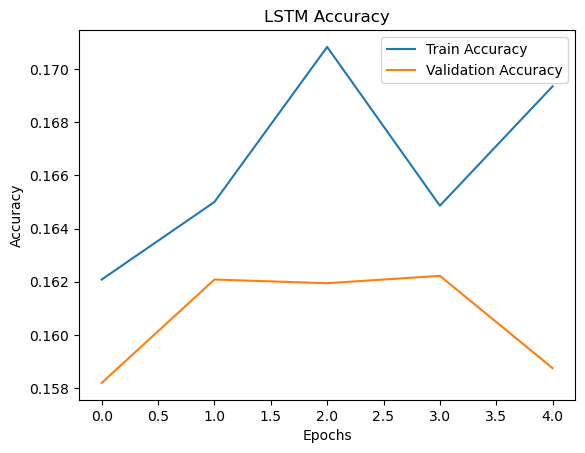

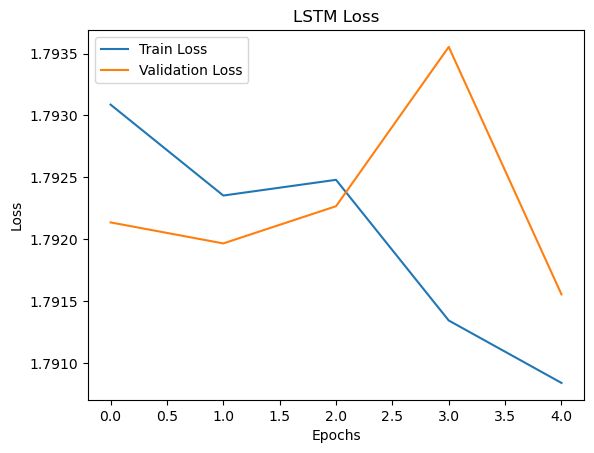

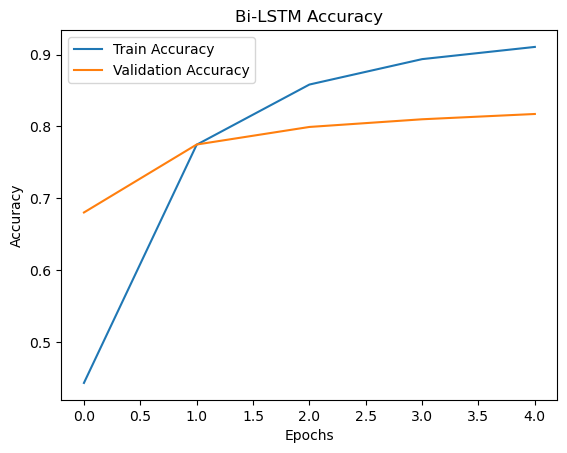

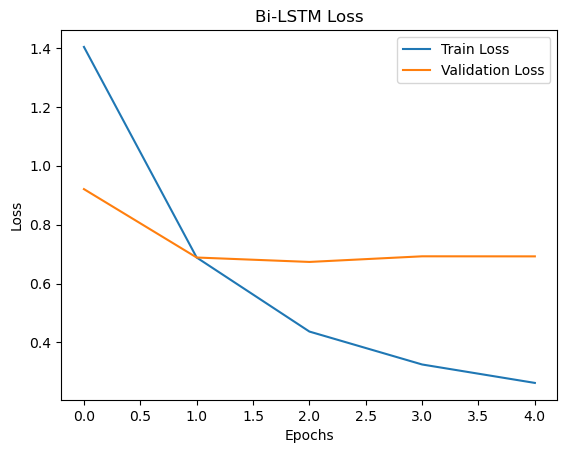

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dropout, Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load dataset
data_path = 'F:/MS Thesis/BanglaText/Train.csv'
df = pd.read_csv(data_path)

# Text preprocessing
max_len = 100  # Max length for padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['Text'])

# Convert texts to sequences
X_seq = tokenizer.texts_to_sequences(df['Text'])

# Pad the sequences
X_pad = pad_sequences(X_seq, maxlen=max_len, padding='post')

# Label Encoding for target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Emotion'])

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_pad, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ===========================
# LSTM Model
# ===========================
lstm_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
history_lstm = lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate LSTM Model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
print(f'LSTM Accuracy: {lstm_accuracy * 100:.2f}%')

# ===========================
# Bi-LSTM Model
# ===========================
bilstm_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

bilstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Bi-LSTM model
history_bilstm = bilstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate Bi-LSTM Model
bilstm_loss, bilstm_accuracy = bilstm_model.evaluate(X_test, y_test)
print(f'Bi-LSTM Accuracy: {bilstm_accuracy * 100:.2f}%')

# ===========================
# Classification Report and Confusion Matrix
# ===========================
def evaluate_model(model, X_test, y_test, label_encoder):
    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=-1)

    # Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate LSTM Model
print("LSTM Model Evaluation")
evaluate_model(lstm_model, X_test, y_test, label_encoder)

# Evaluate Bi-LSTM Model
print("Bi-LSTM Model Evaluation")
evaluate_model(bilstm_model, X_test, y_test, label_encoder)

# ===========================
# Plot Training vs Validation Accuracy and Loss
# ===========================
def plot_history(history, model_name):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot LSTM results
plot_history(history_lstm, "LSTM")

# Plot Bi-LSTM results
plot_history(history_bilstm, "Bi-LSTM")


Epoch 1/5


E:\python\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


900/900 ━━━━━━━━━━━━━━━━━━━━ 53s 53ms/step - accuracy: 0.3713 - loss: 1.5064 - val_accuracy: 0.7013 - val_loss: 0.8447
Epoch 2/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 51s 56ms/step - accuracy: 0.7812 - loss: 0.6419 - val_accuracy: 0.7953 - val_loss: 0.6216
Epoch 3/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 48s 53ms/step - accuracy: 0.8783 - loss: 0.3848 - val_accuracy: 0.8324 - val_loss: 0.5506
Epoch 4/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 52s 58ms/step - accuracy: 0.9129 - loss: 0.2584 - val_accuracy: 0.8386 - val_loss: 0.6020
Epoch 5/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.9353 - loss: 0.1961 - val_accuracy: 0.8499 - val_loss: 0.5878
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8466 - loss: 0.5935
Validation Accuracy (CNN + BiLSTM): 84.99%
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
CNN + BiLSTM Classification Report:
               precision    recall  f1-score   support

       angry       0.85      0.82      0.83      1226
     disgust       0.85      0.89      0.87      1188
    

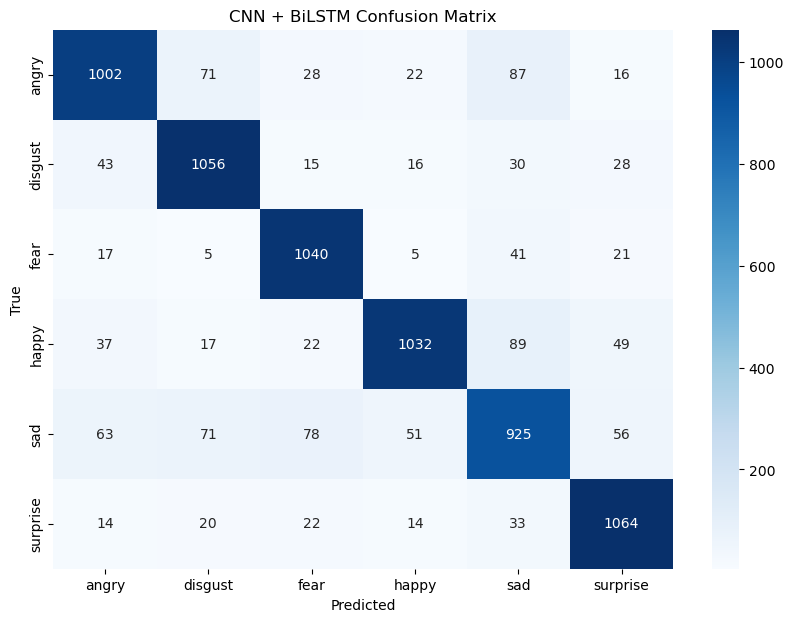

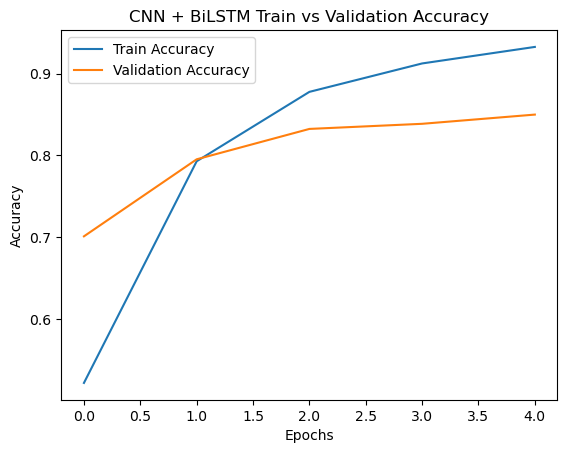

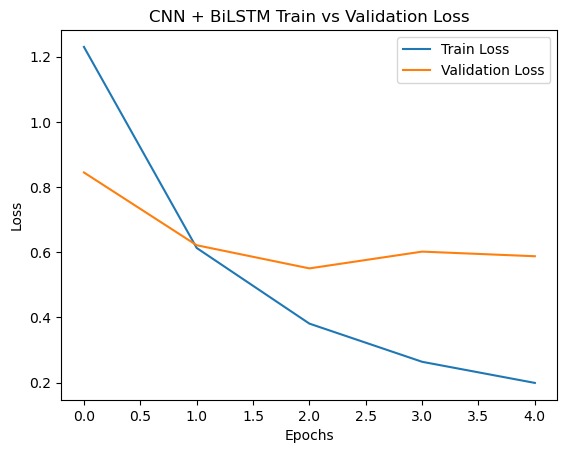

In [13]:
# CNN + BiLSTM Model
cnn_bilstm_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=4),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the CNN + BiLSTM model
cnn_bilstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the CNN + BiLSTM model
history_cnn_bilstm = cnn_bilstm_model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_val_pad, y_val))

# Evaluate the CNN + BiLSTM Model
loss_cnn_bilstm, accuracy_cnn_bilstm = cnn_bilstm_model.evaluate(X_val_pad, y_val)
print(f'Validation Accuracy (CNN + BiLSTM): {accuracy_cnn_bilstm * 100:.2f}%')

# Predict the labels with CNN + BiLSTM
y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_val_pad)
y_pred_classes_cnn_bilstm = y_pred_cnn_bilstm.argmax(axis=-1)

# Print CNN + BiLSTM classification report
print("CNN + BiLSTM Classification Report:\n", classification_report(y_val, y_pred_classes_cnn_bilstm, target_names=label_encoder.classes_))

# CNN + BiLSTM Confusion matrix
conf_matrix_cnn_bilstm = confusion_matrix(y_val, y_pred_classes_cnn_bilstm)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_cnn_bilstm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("CNN + BiLSTM Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Train vs validation accuracy curve for CNN + BiLSTM
plt.plot(history_cnn_bilstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn_bilstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN + BiLSTM Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Train vs validation loss curve for CNN + BiLSTM
plt.plot(history_cnn_bilstm.history['loss'], label='Train Loss')
plt.plot(history_cnn_bilstm.history['val_loss'], label='Validation Loss')
plt.title('CNN + BiLSTM Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 53s 55ms/step - accuracy: 0.2477 - loss: 1.6903 - val_accuracy: 0.6159 - val_loss: 1.0754
Epoch 2/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.6970 - loss: 0.8928 - val_accuracy: 0.7593 - val_loss: 0.7625
Epoch 3/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.8250 - loss: 0.5478 - val_accuracy: 0.8046 - val_loss: 0.6667
Epoch 4/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.8823 - loss: 0.3883 - val_accuracy: 0.8269 - val_loss: 0.6349
Epoch 5/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.9081 - loss: 0.3086 - val_accuracy: 0.8307 - val_loss: 0.6576
Epoch 1/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 94s 104ms/step - accuracy: 0.3197 - loss: 1.5964 - val_accuracy: 0.7126 - val_loss: 0.8469
Epoch 2/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 79s 100ms/step - accuracy: 0.7781 - loss: 0.6657 - val_accuracy: 0.7974 - val_loss: 0.6262
Epoch 3/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 78s 99ms/step - accuracy: 0.8774 - loss: 0.3867 - val_ac

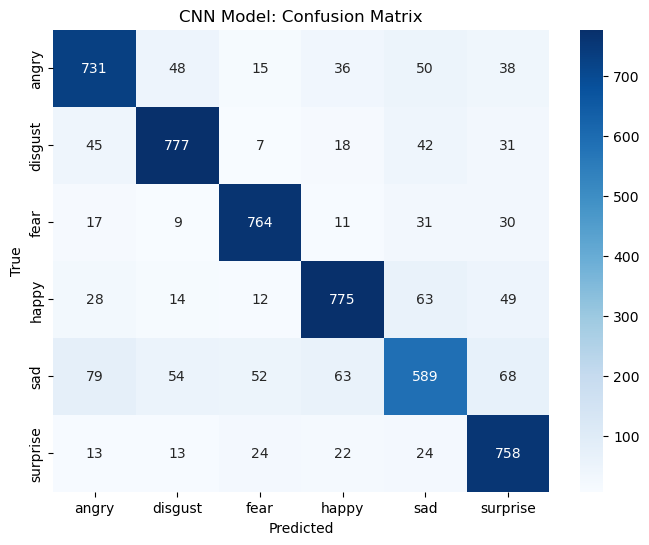

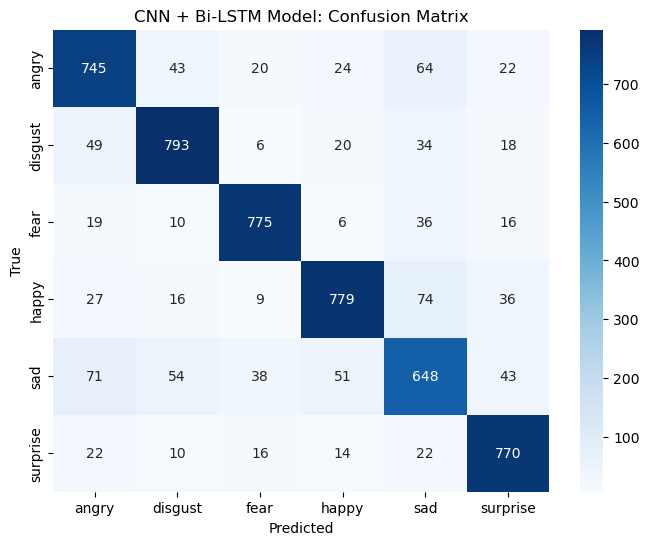

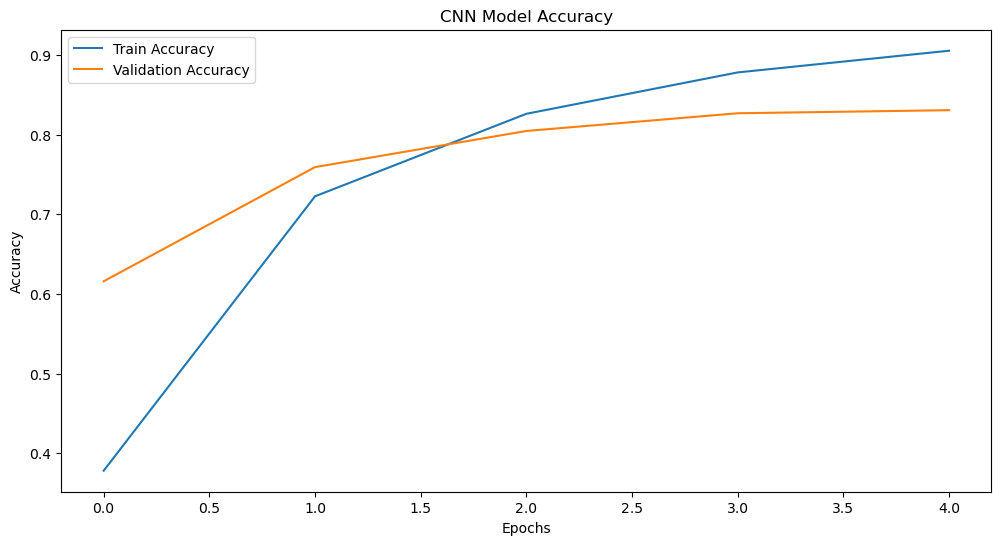

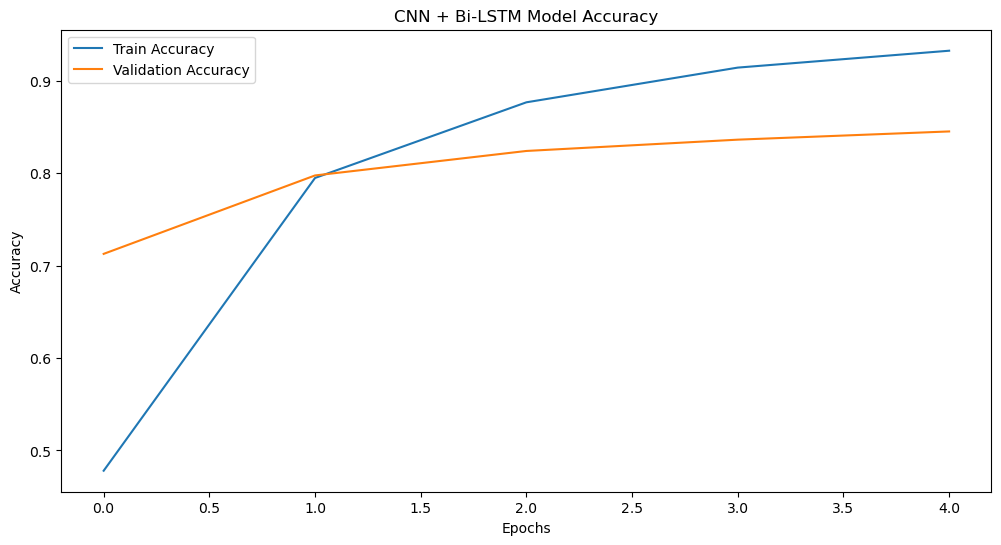

In [20]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Paths
data_path = r'F:\MS Thesis\BanglaText\Train.csv'

# Load Dataset
df = pd.read_csv(data_path)

# Preprocess Dataset
X = df['Text'].values
y = df['Emotion'].values

# Encode Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_names = label_encoder.classes_
num_classes = len(class_names)

# Tokenization and Padding
vocab_size = 10000
embedding_dim = 128
max_length = 100

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=max_length, padding='post')

# Train-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X_pad, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define CNN Model
cnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train CNN Model
history_cnn = cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Define CNN + Bi-LSTM Model
cnn_bilstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

cnn_bilstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train CNN + Bi-LSTM Model
history_cnn_bilstm = cnn_bilstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate Models
print("\nEvaluating CNN Model:")
cnn_eval = cnn_model.evaluate(X_test, y_test)

print("\nEvaluating CNN + Bi-LSTM Model:")
cnn_bilstm_eval = cnn_bilstm_model.evaluate(X_test, y_test)

# Generate Predictions
y_pred_cnn = cnn_model.predict(X_test).argmax(axis=1)
y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test).argmax(axis=1)

# Classification Reports
print("\nCNN Classification Report:")
print(classification_report(y_test, y_pred_cnn, target_names=class_names))

print("\nCNN + Bi-LSTM Classification Report:")
print(classification_report(y_test, y_pred_cnn_bilstm, target_names=class_names))

# Plot Confusion Matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{title}: Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(y_test, y_pred_cnn, "CNN Model")
plot_confusion_matrix(y_test, y_pred_cnn_bilstm, "CNN + Bi-LSTM Model")

# Plot Training Curves
def plot_training_curves(history, title):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_training_curves(history_cnn, "CNN Model")
plot_training_curves(history_cnn_bilstm, "CNN + Bi-LSTM Model")


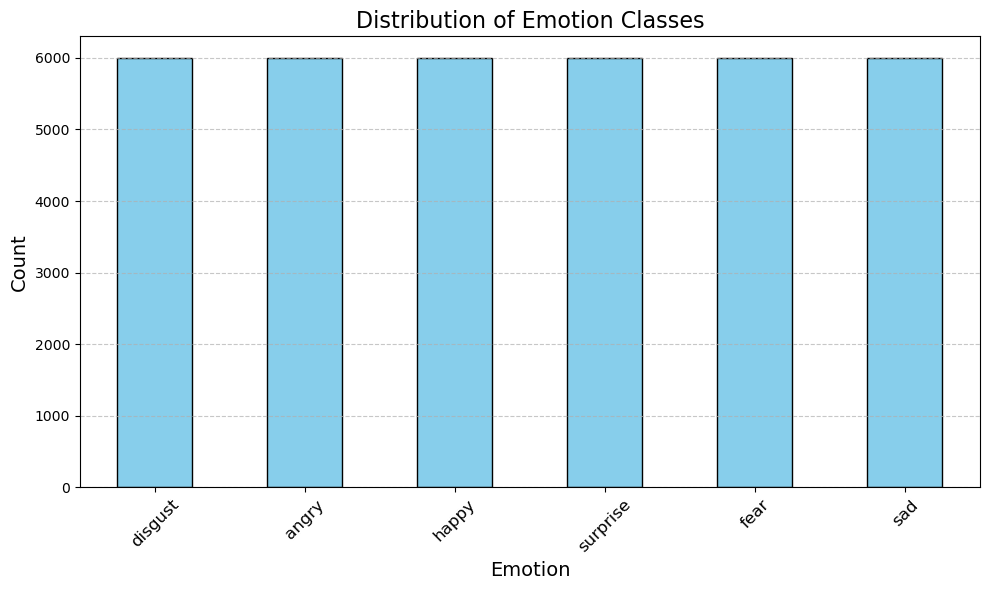

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset
data_path = 'F:/MS Thesis/BanglaText/Train.csv'
df = pd.read_csv(data_path)

# Label Encoding for target variable
label_encoder = LabelEncoder()
df['Encoded_Emotion'] = label_encoder.fit_transform(df['Emotion'])

# Count the occurrences of each emotion
emotion_counts = df['Emotion'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Emotion Classes', fontsize=16)
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()
